<a href="https://colab.research.google.com/github/lalit173/Interior_DesignAI/blob/main/dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [ ]:
from datasets import load_dataset, DatasetDict, Dataset, load_from_disk

In [ ]:
dataset = load_dataset("ellljoy/interior-design")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/30 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['images', 'conditions', 'prompt'],
        num_rows: 30
    })
})

In [ ]:
# dataset = dataset['train'].remove_columns('conditions')
# dataset

Dataset({
    features: ['images', 'prompt'],
    num_rows: 30
})

In [ ]:
# dataset_dict = DatasetDict({"train": dataset})
# dataset_dict

DatasetDict({
    train: Dataset({
        features: ['images', 'prompt'],
        num_rows: 30
    })
})

In [ ]:
dataset['train']['images'][:5]

[<PIL.PngImagePlugin.PngImageFile image mode=P size=2298x1530>,
 <PIL.PngImagePlugin.PngImageFile image mode=P size=2304x1532>,
 <PIL.PngImagePlugin.PngImageFile image mode=P size=2300x1530>,
 <PIL.PngImagePlugin.PngImageFile image mode=P size=2296x1526>,
 <PIL.PngImagePlugin.PngImageFile image mode=P size=2300x1528>]

In [ ]:
def convert_image_mode(image):
    # image = Image.open(path)
    if image.mode != 'RGB':
      image = image.convert("RGB")
    return image

In [ ]:
import pandas as pd

In [ ]:
data_dict = {
    'images':dataset['train']['images'],
    'prompt':dataset['train']['prompt']
}


In [ ]:
data_dict_pd = pd.DataFrame(data_dict)
data_dict_pd[:5]

images  \
0  <PIL.PngImagePlugin.PngImageFile image mode=P ...   
1  <PIL.PngImagePlugin.PngImageFile image mode=P ...   
2  <PIL.PngImagePlugin.PngImageFile image mode=P ...   
3  <PIL.PngImagePlugin.PngImageFile image mode=P ...   
4  <PIL.PngImagePlugin.PngImageFile image mode=P ...   

                                              prompt  
0       a living room with a dining table and chairs  
1                a living room with couches and a tv  
2                a living room with couches and a tv  
3  a living room with hardwood floors and a flat ...  
4  a living room with hardwood floors and a flat ...

In [ ]:
data_dict_pd['images'] = data_dict_pd['images'].apply(convert_image_mode)

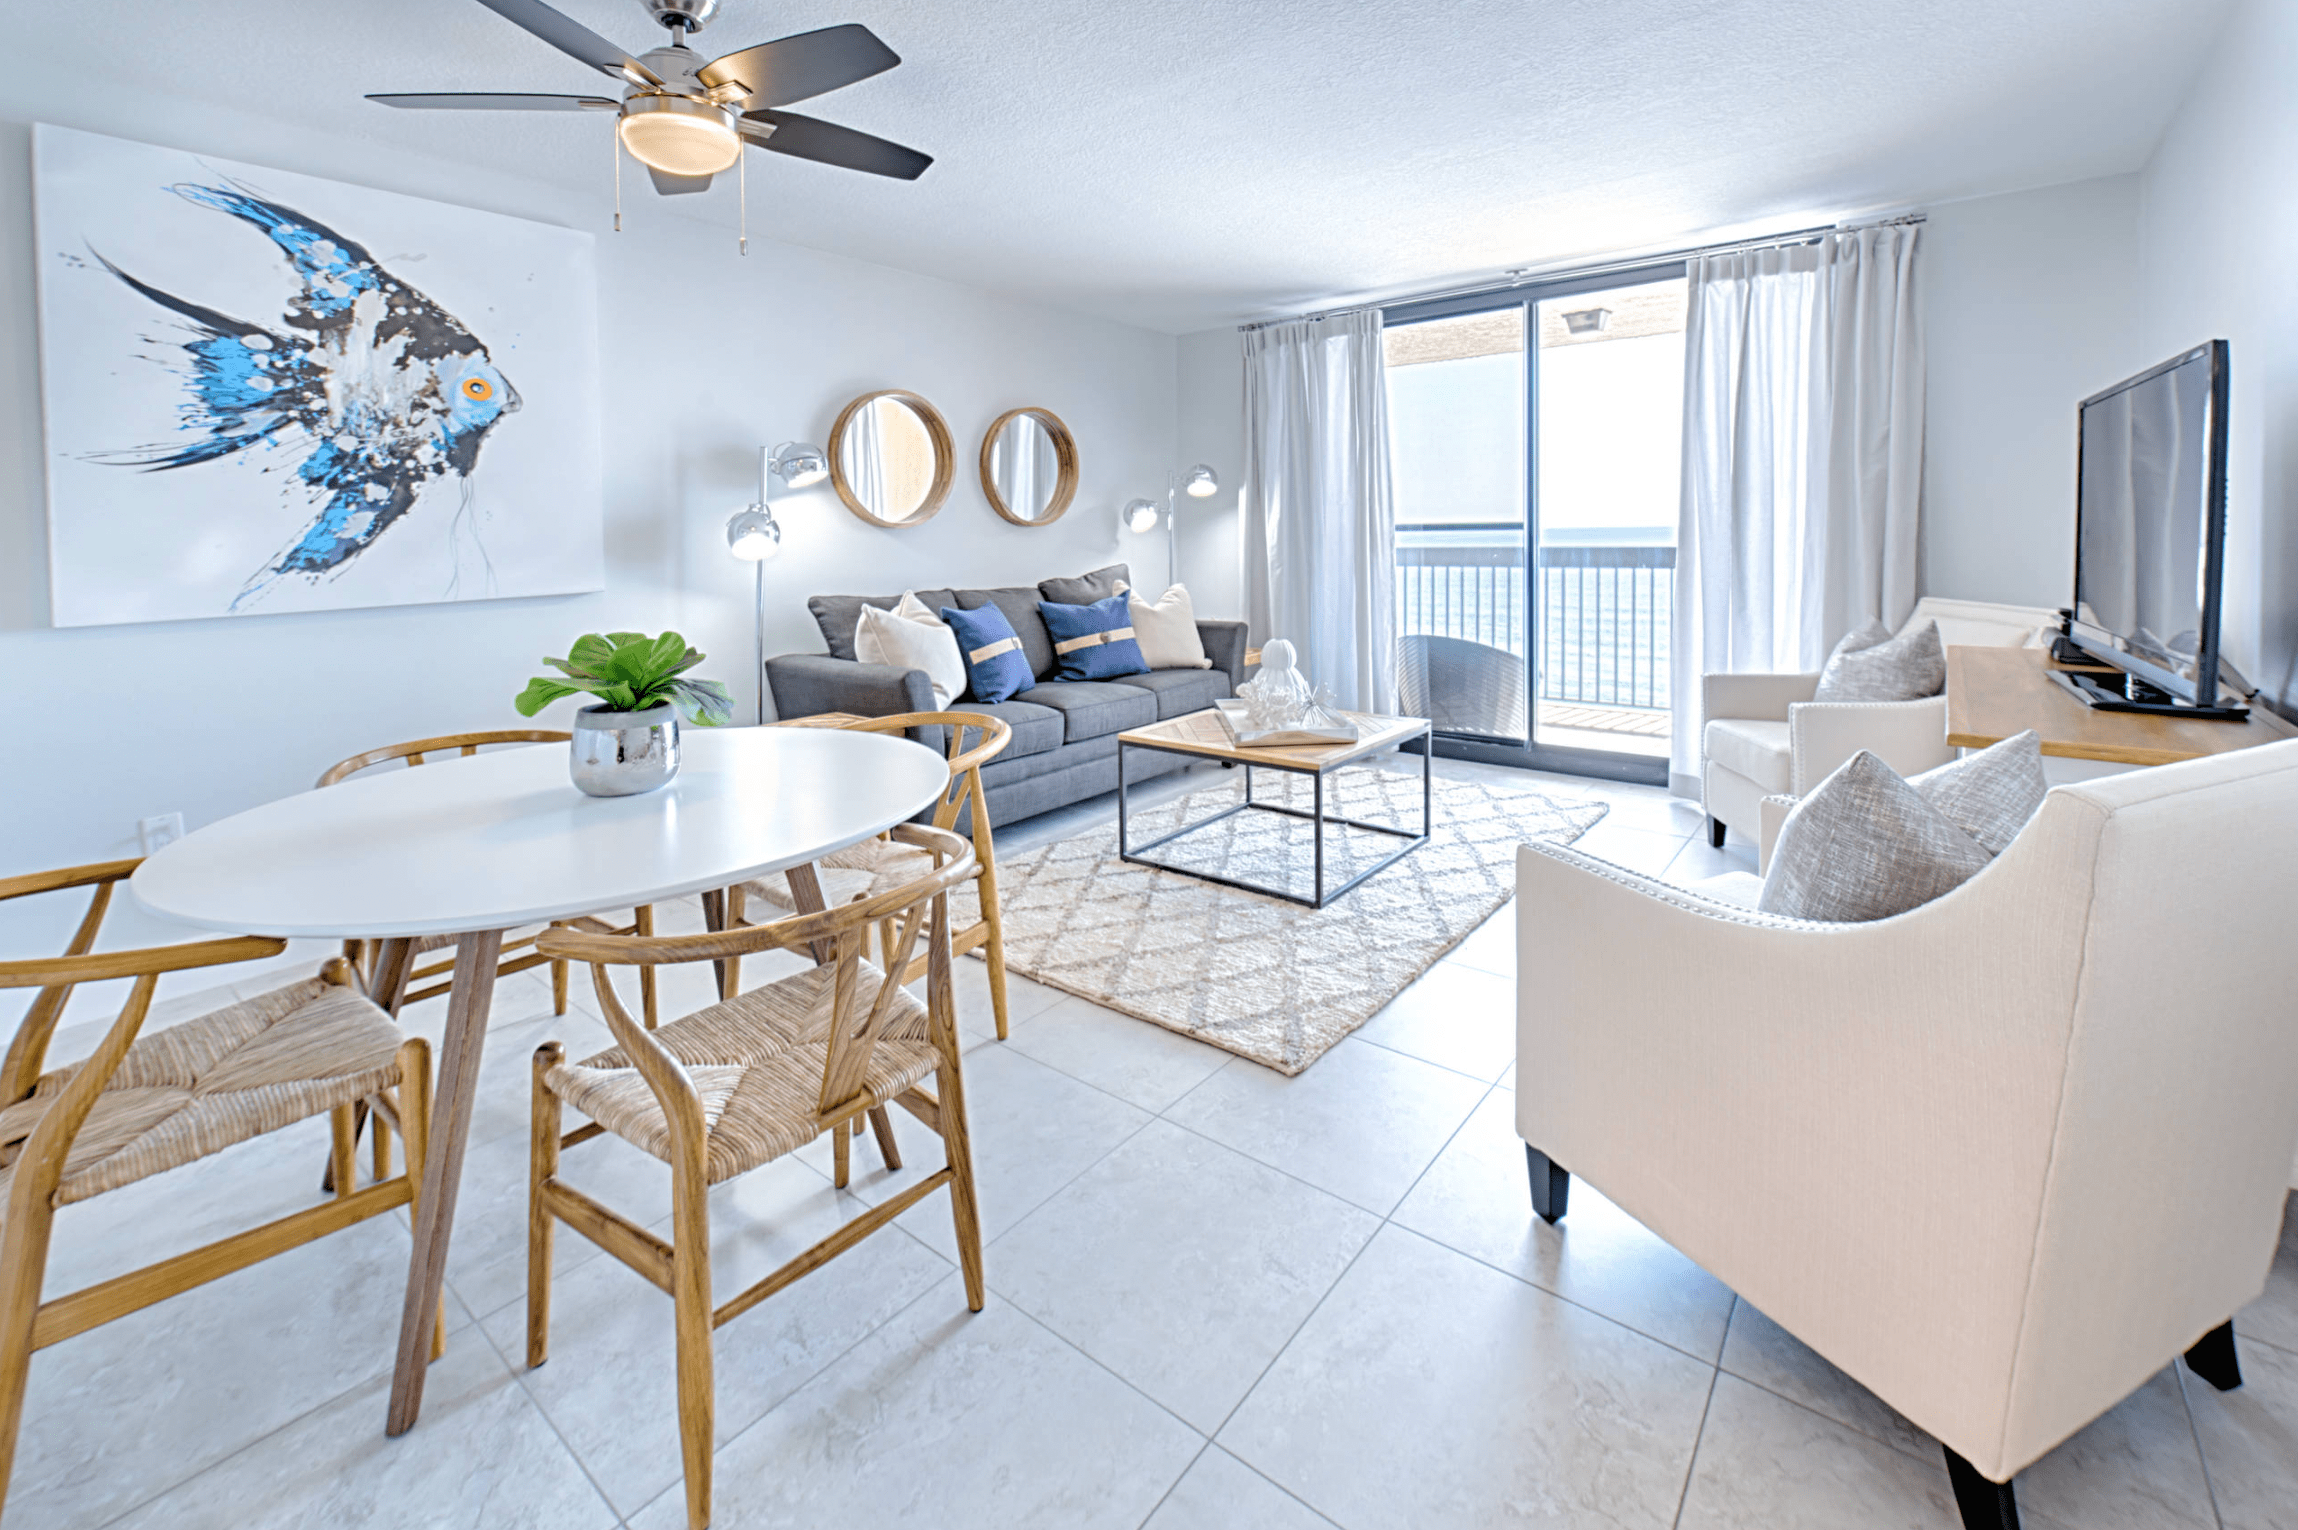

In [ ]:
data_dict_pd['images'][0]

In [ ]:
data_dict_pd['prompt'][0]

'a living room with a dining table and chairs'

In [ ]:
dataset_dict_final = Dataset.from_dict(data_dict_pd)

In [ ]:
dataset_dict_final

Dataset({
    features: ['images', 'prompt'],
    num_rows: 30
})

In [ ]:
dataset_dict_final = DatasetDict({"train": dataset_dict_final})
dataset_dict_final

DatasetDict({
    train: Dataset({
        features: ['images', 'prompt'],
        num_rows: 30
    })
})

In [ ]:
dataset_path_final_version = "/content/drive/MyDrive/Interior_Design/dataset_interior_design"
dataset_dict_final.save_to_disk(dataset_path_final_version)

Saving the dataset (0/1 shards):   0%|          | 0/30 [00:00<?, ? examples/s]

In [ ]:
load_dataset = load_from_disk(dataset_path_final_version)
load_dataset

DatasetDict({
    train: Dataset({
        features: ['images', 'prompt'],
        num_rows: 30
    })
})

In [ ]:
load_dataset['train']['images'][:5]

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=2298x1530>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2304x1532>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2300x1530>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2296x1526>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2300x1528>]

In [ ]:
load_dataset['train']['prompt'][:5]

['a living room with a dining table and chairs',
 'a living room with couches and a tv',
 'a living room with couches and a tv',
 'a living room with hardwood floors and a flat screen tv',
 'a living room with hardwood floors and a flat screen tv']